In [1]:
# Enables higher resolution
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Statistical functions
from scipy import stats 
# Displays HTML representation
from IPython.core.display import display, HTML

import sklearn.metrics as metrics

# Splits arrays / matrices into random train & test subsets
from sklearn.model_selection import train_test_split

# Builds a text report to display the main classification metrics
from sklearn.metrics import classification_report

# Supervised learning machine learning algorithm 
from sklearn.linear_model import LinearRegression

# Accuracy classification score
from sklearn.metrics import accuracy_score

# Confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix

# Encodes target labels
from sklearn.preprocessing import LabelEncoder

### 1. Getting started
`pandas.DataFrame.shape` `pandas.DataFrame.info`

In [2]:
# Import data into a pandas DataFrame
data = pd.read_csv('data/iris.csv')
# Drop Id columns
data.drop('Id', axis=1, inplace=True)

# Returns a tuple containing the dimensionality of the DataFrame
print(data.shape)

# Return the first n rows
display(data.head(n=3))

# Prints a concise summary of the DataFrame
data.info()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. Quick data visualisation
**`seaborn.FacetGrid.map`** **`matplotlib.pyplot.scatter`**

> Step 1.


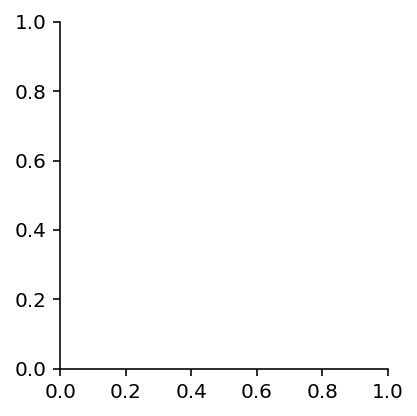

> Step 2.


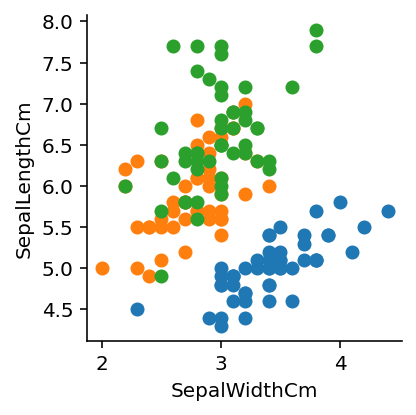

> Step 3.


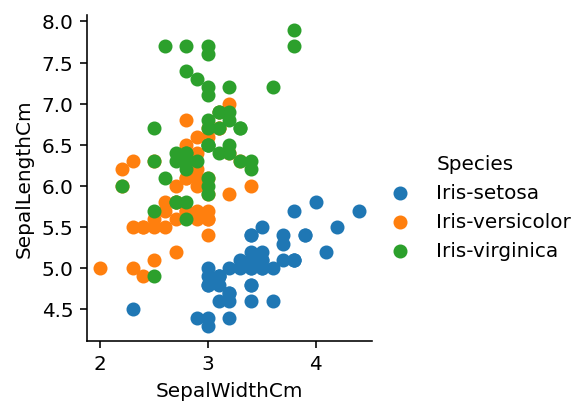

In [3]:
# Initialise the grid
print('> Step 1.')
plt.show(sns.FacetGrid(data, hue='Species', height=3))

# Apply a scatter plot of y vs. x
# - observes relationships between variables
print('> Step 2.')
plt.show(sns.FacetGrid(data, hue='Species', height=3).map(plt.scatter,'SepalWidthCm','SepalLengthCm'))

# Add a legend
print('> Step 3.')
plt.show(sns.FacetGrid(data, hue='Species', height=3).map(plt.scatter,'SepalWidthCm','SepalLengthCm').add_legend())

#### `seaborn.pairplot`

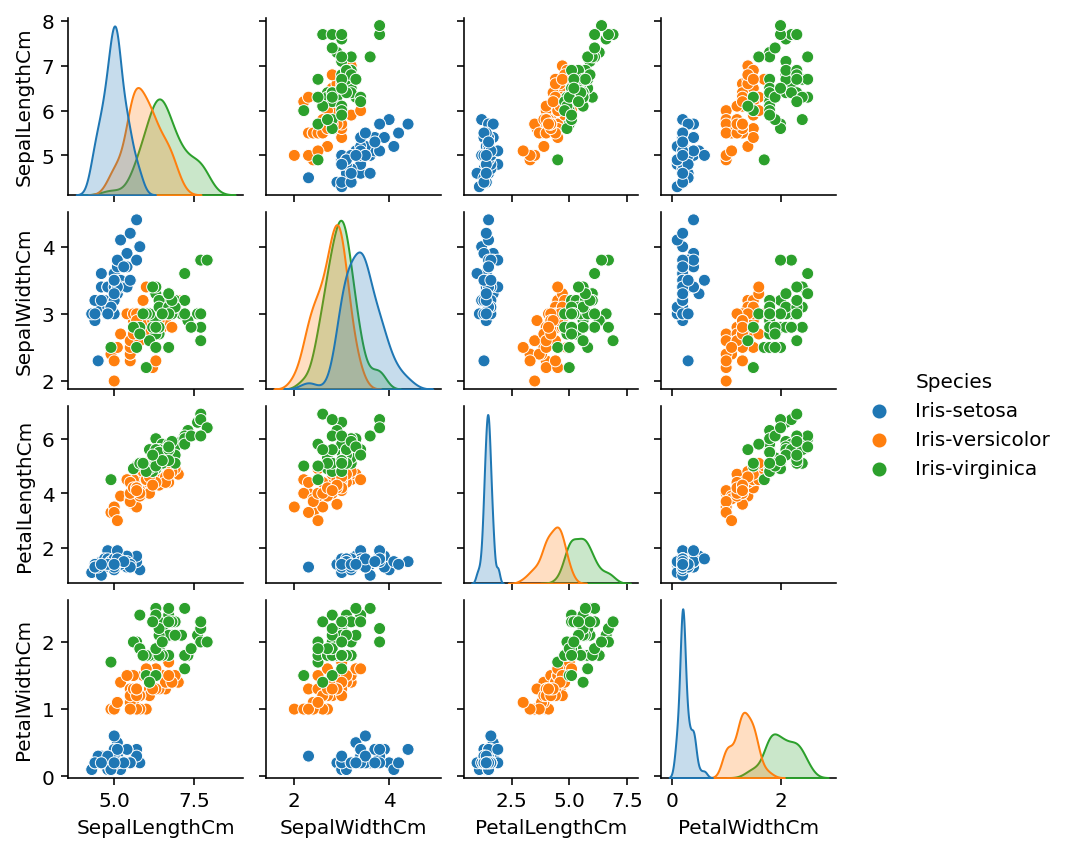

In [4]:
# Apply a pairplot - observes pairwise relationships in a dataset
plt.show(sns.pairplot(data, hue='Species', height=1.5))

### 3. Split dataset into train set & a test set
**`pandas.DataFrame.values`** **`sklearn.model_selection.train_test_split`**

In [5]:
# X - feature variables
X = data.iloc[:, :-1].values  
# y - target variable
y = data.iloc[:, -1].values

# Split the data into trainig & testing datasets
# - note: training set for fitting the model
# - note: test set for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


---

### Supervised learning models

### 1. Linear regression

- A statistical method used to understand the relationship between two variables, x & y

- The variable x, is known as the "predictor variable", while y is known as the "response variable"

- Linear regression finds the line that best "fits" a dataset

#### 1-1 Preparing the dataset

In [6]:
# XL - feature variables
XL = data.iloc[:, :-1].values
display(XL[:5])

# yL - target variable
yL = data.iloc[:, -1].values 
display(yL[:5])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [7]:
# Target variable dtype
# - object (categorical) data must be converted to integer (numerical) data
# - this is done using 'sklearn.preprocessing.LabelEncoder'
print(yL.dtype)

object


#### `sklearn.preprocessing.LabelEncoder` 
#### `.fit_transform()` 
#### `sklearn.model_selection.train_test_split`

In [8]:
# Step 1. Create LabelEncoder object
label_encoder = LabelEncoder()

# Step 2. Fit transformer to target variable
target_data = label_encoder.fit_transform(yL)
print(target_data.dtype)

# targetData - target variable
display(target_data)

# Step 3. Data now ready to be split into train set & test set
XL_train, XL_test, yL_train, yL_test = train_test_split(XL, target_data, test_size=0.3, random_state=0)
print(XL_train.shape, XL_test.shape, yL_train.shape, yL_test.shape)

int64


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(105, 4) (45, 4) (105,) (45,)


#### 1-2 Building the model
#### `sklearn.linear_model.LinearRegression` 
#### `.fit()` 
#### `.predict()`

In [9]:
# Create LinearRegression object 
model_lr = LinearRegression()

# Fit the model with trainig dataset (feature variables, target variable)
model_lr.fit(XL_train, yL_train)

# Evaluate the model with test dataset (feature variables)
target_predictions = model_lr.predict(XL_test)

# View model predictions - i.e. the predicted target value
display(target_predictions)

# Compare predictions with test dataset target variable values
display(yL_test)

array([ 2.07863376,  0.96669898, -0.15934059,  1.82209546, -0.03128655,
        2.29167009, -0.03326614,  1.30556458,  1.26630691,  1.10590682,
        1.61291114,  1.29882172,  1.24583575,  1.31726102,  1.35560867,
       -0.06446882,  1.37252277,  1.26780932,  0.03810685, -0.05301757,
        1.83345137,  1.43872911,  0.11461187,  0.05223725,  1.59172014,
       -0.1067769 ,  0.16770375,  1.17090695,  0.93927314,  0.10832465,
        1.74781133,  1.47276913, -0.06720024,  1.6329574 ,  2.00469015,
        1.28881924, -0.04616879,  1.59988104,  1.30377528,  1.10489089,
        1.84907488, -0.03240839,  1.82996938,  0.21809757, -0.1049876 ])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

#### 1-3 Calculating the residuals

- The residual for each observation is the difference between predicted values of y & observed values of y.


- `residual = actual y value - predicted y value`

In [10]:
# y-intercept - value at which the fitted line crosses the y-axis (value of y when x is 0)
display(model_lr.intercept_)

0.35230303668110297

In [11]:
# beta coefficients - compares the strength of the effect of each IV to the DV
# - the higher the absolute value of the beta coefficient, the stronger the effect
display(model_lr.coef_)

array([-0.17020006, -0.01873675,  0.27964604,  0.55823298])

In [12]:
# mean absolute error (MAE) - is the average of all absolute errors
display(metrics.mean_absolute_error(yL_test, target_predictions))

0.19694319022859288

In [13]:
# mean squared error (MSE) - how close a regression line is to a set of points (the lower the better)
display(metrics.mean_squared_error(yL_test, target_predictions))

0.05879791876843436

In [14]:
# root-mean-square deviation (RMSE) - the standard deviation of the residuals (prediction errors)
display(np.sqrt(metrics.mean_squared_error(yL_test, target_predictions)))

0.24248282159450876

In [15]:
# r2 score - how well the regression model fits the observed data (higher score indicates a better fit for the model)
display(metrics.r2_score(yL_test, target_predictions))

0.899944718062118